<a href="https://colab.research.google.com/github/HARXHTIWARI/customer-conversion-prediction/blob/main/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Customer Conversion Prediction Using Decision Tree & Logistic Regression

**Project Overview:**


*   **Objective**: The project aims to predict whether a customer will convert (i.e., purchase a product or service) based on demographics and past marketing campaign interactions. This will be achieved through two machine learning models—Decision Tree and Logistic Regression.
*   **Dataset**: Data from a bank marketing campaign, including customer demographics, balance, and responses to the campaign, will be used.




**Data Loading and Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("/content/bank-full.csv", sep=';', encoding='latin1')

# Verify the data is loaded
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


,0


**Train-Test Split:**

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable after encoding
y = data_encoded['y_yes']

# Split the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((36168, 42), (9043, 42), (36168,), (9043,))

**Exploratory Data Analysis (EDA):**

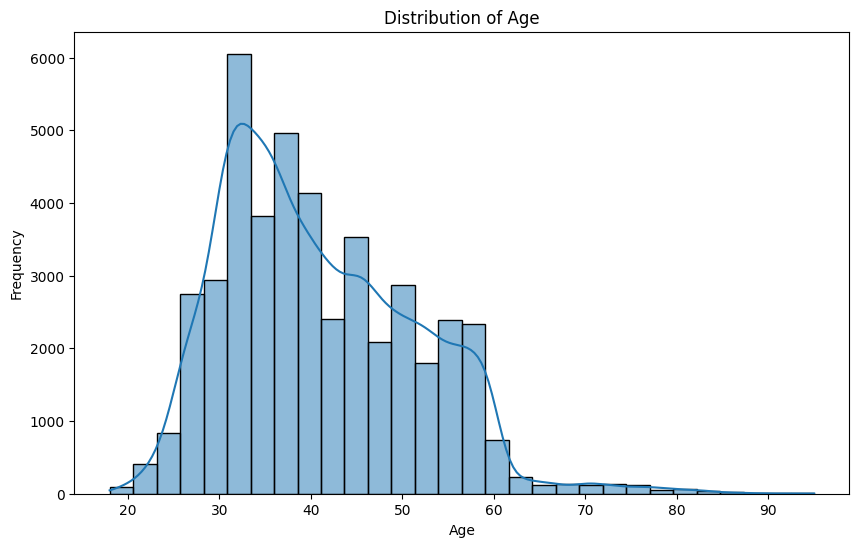

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


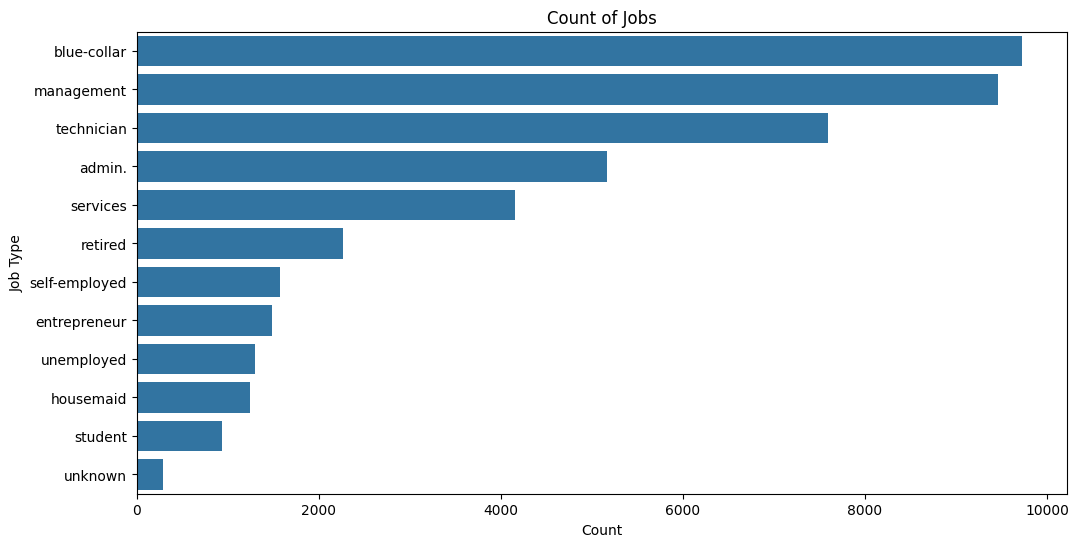

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Count of Jobs')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()


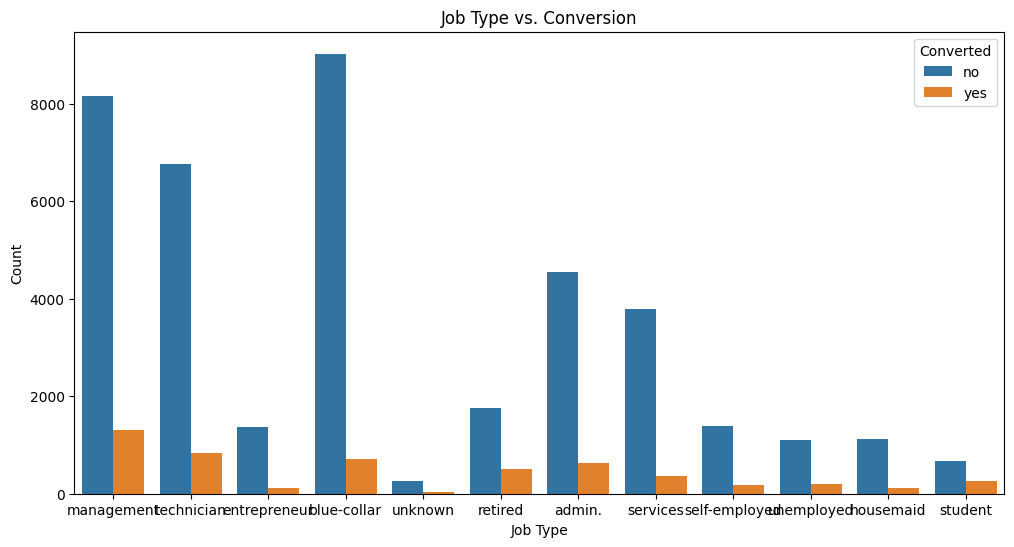

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data)
plt.title('Job Type vs. Conversion')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')
plt.show()


**Model Building:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


**Decision Tree Classifier**

In [ ]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = decision_tree_model.predict(X_test)


**Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train the Logistic Regression model with more iterations
logistic_model = LogisticRegression(max_iter=2000, random_state=42)  # Increased to 2000
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
lr_predictions = logistic_model.predict(X_test_scaled)


**Model Evaluation:**

*Metrics:*

*   Confusion Matrix
*   Accuracy
*    F1-Score
*  Precision
*   Recall





In [ ]:
print("Decision Tree Model Evaluation")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

print("\nLogistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Decision Tree Model Evaluation
Accuracy: 0.8705075749198274
Confusion Matrix:
 [[7344  608]
 [ 563  528]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.92      0.93      7952
        True       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Logistic Regression Model Evaluation
Accuracy: 0.8988167643481145
Confusion Matrix:
 [[7755  197]
 [ 718  373]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.94      7952
        True       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



**User Input Prediction Functionality:**
 A function that allows users to input customer data and receive a conversion prediction using both models. This demonstrates the model's real-world application.

 **Example**: Users can input values for features such as age, job type, balance, loan status, etc., and the models will output the predicted likelihood of conversion.

In [ ]:
def preprocess_input(input_data):
    input_df = pd.DataFrame(input_data, index=[0])  # Shape (1, n_features)
    input_df_encoded = pd.get_dummies(input_df, drop_first=True)

    # Align the columns with training data
    missing_cols = set(X.columns) - set(input_df_encoded.columns)
    for c in missing_cols:
        input_df_encoded[c] = 0
    input_df_encoded = input_df_encoded[X.columns]  # Reorder columns to match
    return input_df_encoded

In [ ]:

# Function to take user input and make predictions
def make_prediction():
    input_data = {
        'age': int(input("Enter age: ")),
        'job': input("Enter job type (e.g., 'admin', 'blue-collar', 'entrepreneur', etc.): "),
        'marital': input("Enter marital status (e.g., 'single', 'married', 'divorced'): "),
        'education': input("Enter education level (e.g., 'primary', 'secondary', 'tertiary'): "),
        'default': input("Does the customer have a credit in default? (yes/no): "),
        'balance': float(input("Enter account balance: ")),
        'housing': input("Does the customer have a housing loan? (yes/no): "),
        'loan': input("Does the customer have a personal loan? (yes/no): "),
        'contact': input("Enter contact type (e.g., 'cellular', 'telephone'): "),
        'day': int(input("Enter last contact day of the month (1-31): ")),
        'month': input("Enter last contact month of the year (e.g., 'jan', 'feb', ..., 'dec'): "),
        'duration': int(input("Enter last contact duration (in seconds): ")),
        'campaign': int(input("Enter number of contacts performed during this campaign: ")),
        'pdays': int(input("Enter number of days since the client was last contacted: ")),
        'previous': int(input("Enter number of contacts performed before this campaign: ")),
        'poutcome': input("Enter outcome of the previous marketing campaign (e.g., 'success', 'failure', 'other'): ")
    }

    # Preprocess input data
    input_data_processed = preprocess_input(input_data)

    # Make predictions
    dt_prediction = decision_tree_model.predict(input_data_processed)
    lr_prediction = logistic_model.predict(input_data_processed)

    # Display results
    print(f"Decision Tree Prediction: {'High chances of getting converted' if dt_prediction[0] == 1 else 'Low chances of getting converted'}")
    print(f"Logistic Regression Prediction: {'High chances of getting converted' if lr_prediction[0] == 1 else 'Low chances of getting converted'}")

# Run the prediction function
make_prediction()

Enter age: 55
Enter job type (e.g., 'admin', 'blue-collar', 'entrepreneur', etc.): management
Enter marital status (e.g., 'single', 'married', 'divorced'): married
Enter education level (e.g., 'primary', 'secondary', 'tertiary'): secondary
Does the customer have a credit in default? (yes/no): no
Enter account balance: 1000
Does the customer have a housing loan? (yes/no): yes
Does the customer have a personal loan? (yes/no): yes
Enter contact type (e.g., 'cellular', 'telephone'): telephone
Enter last contact day of the month (1-31): 15
Enter last contact month of the year (e.g., 'jan', 'feb', ..., 'dec'): jun
Enter last contact duration (in seconds): 120
Enter number of contacts performed during this campaign: 3
Enter number of days since the client was last contacted: 5
Enter number of contacts performed before this campaign: 2
Enter outcome of the previous marketing campaign (e.g., 'success', 'failure', 'other'): success
Decision Tree Prediction: Low chances of getting converted
Logis

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
